# 1. Geometrical transformations
In these exercises you will first implement Python definitions for computing transformation matrices for different geometrical transformations. Then, you will implement code for converting a transformation matrix to homogeneous form. All needed information for implementing these functions can be found in the lecture slides. In the beginning, you will apply the transformations to geometric objects, however, the same functions will be later used for image transformation.


## 1.1. Transformation matrices
### (A)
Assuming that the coordinates of a 2D geometric object are stored in the variable `X` (the first row contains the horizontal coordinates and the second row contains the vertical coordinates), translation of the geometric object can be performed by adding a 2D translation vector `Xt` to every vertex of `X`:

```python
X[0,:] = X[0,:] + Xt[0]
X[1,:] = X[1,:] + Xt[1]
```

Translation is arguably the "simplest" geometrical transformation that can be applied to an object. Let's leave it aside for now and focus on the other geometrical transformations. The identity, scaling, rotation, reflection and shearing transformations (or any combination of these transformations) can be performed by multiplying the matrix of coordinates `X` with an appropriate transformation matrix `T`. Here is an example of Python code that compute transformation matrices for the identity transformation (which is not really a transformation) and scaling:

```python
import numpy as np

def identity():
    T = np.eye(2)
    return T

def scale(sx, sy):
    T = np.array([[sx,0],[0,sy]])
    return T
```

Using this implementation, scaling can be performed for example in the following way: `X_scaled = scale(2,3)*X`. To verify this, we can use the provided `test_object()` function in the `utilities.py` module that returns a test geometrical object in the shape of the letter *F*, and plot the original object and a scaled version of it (the provided `plot_object()` function in the `utilities.py` module can be used to plot the geometrical object) as follows:

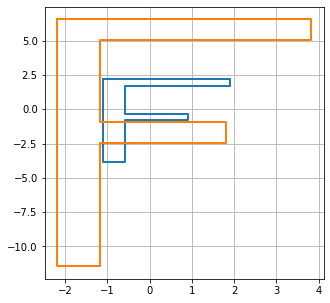

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
import numpy as np
import matplotlib.pyplot as plt
import registration as reg
import registration_util as util

X = util.test_object(1)
X_scaled = reg.scale(2, 3).dot(X)

fig = plt.figure(figsize=(5,5))
ax1  = fig.add_subplot(111)
ax1.grid()
util.plot_object(ax1, X)
util.plot_object(ax1, X_scaled)

### EXERCISE:
Implement functions that return transformation matrices for 2D rotation, shearing and reflection. You can find the templates for these three definitions in `# SECTION 1` of the `registration.py` module. To test your implementation, run the `transforms_test()` script from the `registration_tests.py` module and make sure that the output matches the figure below.

<img src="../notebooks/assets/transforms_test.png" width="800" height="600" align="center"/>

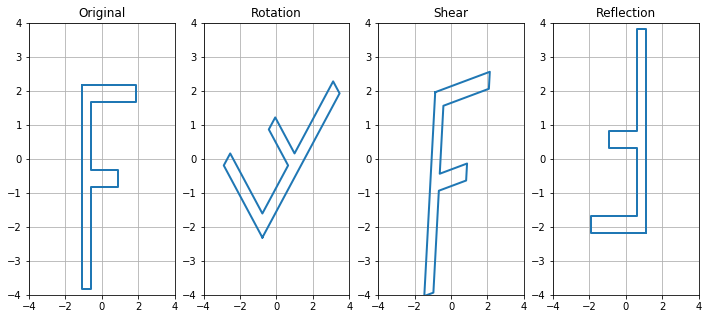

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import transforms_test

transforms_test()

### (B)
Geometrical transformations can be combined by multiplying transformation matrices. For example, the following (conceptual) command first applies a 90° rotation to an object and then a vertical reflection: `X_t = reflect(-1,1)*rotate(pi/2)*X`. 

### QUESTION:
Would the result be different if the two transformations in the example above are applied in reversed order? Motivate your answer. 

Yes because matrix multiplication is not commutative

### EXERCISE:
Test a few more examples of combining transformations. Save the examples in the `combining_transforms()` script template in the `registration_tests.py` module.

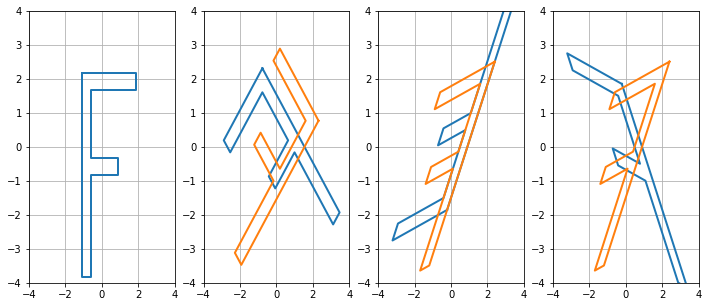

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import combining_transforms

combining_transforms()

## 1.2. Homogeneous coordinates
### (A)
As it was mentioned at the beginning of the previous exercise, translation can be performed by adding a translation vector to the coordinates of an object. Translation can be combined with other geometrical transformations, for example:

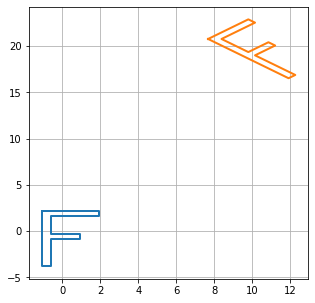

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
import numpy as np
import matplotlib.pyplot as plt
import registration as reg
import registration_util as util

X = util.test_object(1)

# translation vector
t = np.array([10, 20])

# rotate by 45 deg.
X_rot = reg.rotate(np.pi/4).dot(X)

# translate by 10 in the horizontal and 20 in the vertical direction
X_rot_tran = np.empty(shape=X.shape)
X_rot_tran[0,:] = X_rot[0,:] + t[0];
X_rot_tran[1,:] = X_rot[1,:] + t[1];

fig = plt.figure(figsize=(5,5))
ax1  = fig.add_subplot(111)
ax1.grid()
util.plot_object(ax1, X)
util.plot_object(ax1, X_rot_tran)

However, this way of combining translation with other transformations can be a bit cumbersome (it somewhat complicates the mathematical notation and implementation in code). The transformations that you have implemented in the previous exercise can be straightforwardly combined with translation by converting the transformation matrix to homogeneous form. This matrix can then be applied to the homogeneous coordinates (details can be found in the lecture slides). The function `c2h()` given below (also available in the `utilities.py` module) implements conversion from Cartesian coordinates to homogeneous coordinates. As you can see from the code, this conversion is performed by simply adding an additional row of coordinates with all ones:

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
import registration_util as util
import numpy as np

X = util.test_object(1)
Xh = util.c2h(X)

print('X:\n{}\n'.format(X))
print('Xh:\n{}\n'.format(Xh))

X:
[[-1.09090909 -1.09090909 -0.59090909 -0.59090909  0.90909091  0.90909091
  -0.59090909 -0.59090909  1.90909091  1.90909091 -1.09090909]
 [ 2.18181818 -3.81818182 -3.81818182 -0.81818182 -0.81818182 -0.31818182
  -0.31818182  1.68181818  1.68181818  2.18181818  2.18181818]]

Xh:
[[-1.09090909 -1.09090909 -0.59090909 -0.59090909  0.90909091  0.90909091
  -0.59090909 -0.59090909  1.90909091  1.90909091 -1.09090909]
 [ 2.18181818 -3.81818182 -3.81818182 -0.81818182 -0.81818182 -0.31818182
  -0.31818182  1.68181818  1.68181818  2.18181818  2.18181818]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.        ]]



### EXERCISE:
Implement the function called `t2h()` in the `utilities.py` module that converts a transformation matrix and a translation vector to a transformation matrix in homogeneous form. The template for this definition is already provided in the module file. To test your function, verify that the `t2h_test()` script results in the same object as the example above (note that the function `plot_object()` also works with homogeneous coordinates):

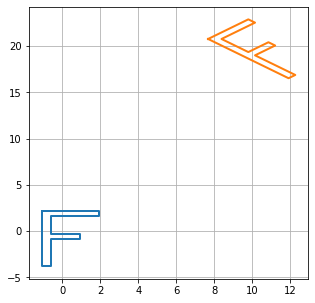

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import t2h_test

t2h_test()

### (B)
The rotation transformation rotates the objects counterclockwise around the origin of the coordinate system. To perform rotation around an arbitrary point, the following sequence of transformations must be applied:
1. Translate the object so the arbitrary rotation point is translated to the origin of the coordinate system
2. Rotate the object
3. Translate the object back so that the arbitrary rotation point is in the original location.

These three transformation can be combined by multiplying the three homogeneous transformation matrices. Combining transformation matrices in homogeneous form works in the same way as the "regular" transformation matrices, i.e. by matrix multiplication. 

### EXERCISE:
Write an example that rotates the test object by 45° around the first vertex (hint: the first vertex is `X[:,0]` and `t2h(reg.identity(), Xt)` is a homogeneous transformation matrix that performs only translation). Save the example in the provided `arbitrary_rotation()` template in the `registration_tests.py` module. The result should match the one shown in the figure below.

<img src="../notebooks/assets/arbitrary_rotation.png" width="400" align="center"/>


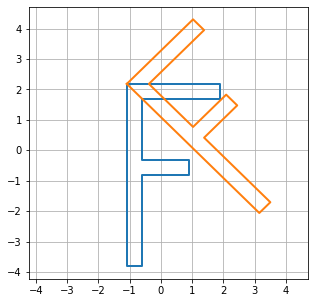

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import arbitrary_rotation

arbitrary_rotation()

### (C)
### QUESTION:
What is rigid and what affine transformation? How many degrees of freedom dothese two types of transformations have in 2D?

rigid keeps the distances between points the same


Rigid: 3 degrees of freedom
Affine: 6 degrees of freedom

In [ ]:
# plots
%matplotlib inline
import sys
sys.path.append("../code")
from registration_project import intensity_based_registration
import Plots

Plots.plotcor()
Plots.mi()

In [ ]:
"""
Registration project code.
"""

import numpy as np
import matplotlib.pyplot as plt
import registration as reg
from IPython.display import display, clear_output


def intensity_based_registration_demo():

    # read the fixed and moving images
    # change these in order to read different images
    I = plt.imread('../data/image_data/1_1_t1.tif')
    Im = plt.imread('../data/image_data/1_1_t1_d.tif')

    # initial values for the parameters
    # we start with the identity transformation
    # most likely you will not have to change these
    x = np.array([0., 0., 0.])

    # NOTE: for affine registration you have to initialize
    # more parameters and the scaling parameters should be
    # initialized to 1 instead of 0

    # the similarity function
    # this line of code in essence creates a version of rigid_corr()
    # in which the first two input parameters (fixed and moving image)
    # are fixed and the only remaining parameter is the vector x with the
    # parameters of the transformation

    # Function gave error due to passing of more than just the correlation
    # value (also transformed picture and transformation). This small change
    # solves this problem...
    fun = lambda x: (reg.rigid_corr(I, Im, x))[0]
    fun_full = lambda x: reg.rigid_corr(I, Im, x)

    # the learning rate
    mu = 0.001

    # number of iterations
    num_iter = 200

    iterations = np.arange(1, num_iter+1)
    similarity = np.full((num_iter, 1), np.nan)

    fig = plt.figure(figsize=(14,6))

    # fixed and moving image, and parameters
    ax1 = fig.add_subplot(121)

    # fixed image
    im1 = ax1.imshow(I)
    # moving image
    im2 = ax1.imshow(I, alpha=0.7)
    # parameters
    txt = ax1.text(0.3, 0.95,
        np.array2string(x, precision=5, floatmode='fixed'),
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10},
        transform=ax1.transAxes)

    # 'learning' curve
    ax2 = fig.add_subplot(122, xlim=(0, num_iter), ylim=(0, 1))

    learning_curve, = ax2.plot(iterations, similarity, lw=2)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Similarity')
    ax2.grid()

    # perform 'num_iter' gradient ascent updates
    for k in np.arange(num_iter):

        # gradient ascent
        g = reg.ngradient(fun, x)
        x += g*mu

        # for visualization of the result
        S, Im_t, _ = fun_full(x)

        clear_output(wait = True)

        # update moving image and parameters
        im2.set_data(Im_t)
        txt.set_text(np.array2string(x, precision=5, floatmode='fixed'))

        # update 'learning' curve
        similarity[k] = S
        learning_curve.set_ydata(similarity)

        display(fig)


def intensity_based_registration(I_path, Im_path, r_a_switch=0, corr_mi_switch=0, plotim=1):

    # r_a_switch: 0 --> rigid (default)
    #             1 --> affine
    assert r_a_switch == 0 or r_a_switch == 1, "Error: input parameter r_a_switch must be either 0 or 1.. "

    # corr_mi_switch: 0 --> correlation (default)
    #                 1 --> mutual information
    assert r_a_switch == 0 or r_a_switch == 1, "Error: input parameter r_a_switch must be either 0 or 1.. "

    # read the fixed and moving images
    # change these in order to read different images
    I = plt.imread(I_path)
    Im = plt.imread(Im_path)

    # initial values for the parameters
    if r_a_switch == 0:
        x = np.array([0., 0., 0.]) # rotation,transx,transy
    elif r_a_switch == 1:
        x = np.array([0., 1., 1.,0.,0.,0.,0.]) # rotation,scalex,scaley,shearx,sheary,transx,transy
    else:
        print("ERROR.. r_a_switch must be either 0 or 1")

    # the similarity function
    # this line of code in essence creates a version of rigid_corr()
    # in which the first two input parameters (fixed and moving image)
    # are fixed and the only remaining parameter is the vector x with the
    # parameters of the transformation

    if r_a_switch == 0:
        assert corr_mi_switch == 0, "Error, only correlation similarity possible with rigid registration"
        sim_fun = reg.rigid_corr
    elif r_a_switch == 1:
        if corr_mi_switch == 0:
            sim_fun = reg.affine_corr
        else:
            sim_fun = reg.affine_mi
    else:
        print("ERROR.. r_a_switch must be either 0 or 1")

    fun = lambda x: (sim_fun(I, Im, x))[0]
    fun_full = lambda x: sim_fun(I, Im, x)

    # if r_a_switch == 0:
    #     fun = lambda x: (reg.rigid_corr(I, Im, x))[0]
    #     fun_full = lambda x: reg.rigid_corr(I, Im, x)
    # elif r_a_switch == 1:
    #     fun = lambda x: (reg.affine_corr(I, Im, x))[0]
    #     fun_full = lambda x: reg.affine_corr(I, Im, x)
    # else:
    #     print("ERROR.. r_a_switch must be either 0 or 1")

    # the learning rate
    mu = 0.001

    # number of iterations
    num_iter = 50

    iterations = np.arange(1, num_iter+1)
    similarity = np.full((num_iter, 1), np.nan)

    if plotim==1:
        fig = plt.figure(figsize=(14,6))

        # fixed and moving image, and parameters
        ax1 = fig.add_subplot(121)

        # fixed image
        im1 = ax1.imshow(I)
        # moving image
        im2 = ax1.imshow(I, alpha=0.7)
        # parameters
        txt = ax1.text(0.3, 0.95,
            np.array2string(x, precision=5, floatmode='fixed'),
            bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10},
            transform=ax1.transAxes)

        # 'learning' curve
        ax2 = fig.add_subplot(122, xlim=(0, num_iter), ylim=(0, 1))

        learning_curve, = ax2.plot(iterations, similarity, lw=2)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Similarity')
        ax2.grid()

    # perform 'num_iter' gradient ascent updates
    for k in np.arange(num_iter):
        mu=((k-num_iter)**2/(num_iter)**2)/1000
        # gradient ascent
        g = reg.ngradient(fun, x)
        x += g*mu
        # for visualization of the result
        S, Im_t, _ = fun_full(x)
        clear_output(wait = True)
        similarity[k] = S
        # update moving image and parameters
        if plotim==1:
            im2.set_data(Im_t)
            txt.set_text(np.array2string(x, precision=5, floatmode='fixed'))
            # update 'learning' curve
            learning_curve.set_ydata(similarity)
            display(fig)

    return similarity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import registration as reg
from IPython.display import display, clear_output
import registration_project as pro

def plotcor():
    I_path = '../data/image_data/1_1_t1.tif'
    Im_path = '../data/image_data/1_1_t1_d.tif'
    Im_path_t2 = '../data/image_data/1_1_t2.tif'
    ex1=pro.intensity_based_registration(I_path, Im_path, 0, 0, 0)
    ex2=pro.intensity_based_registration(I_path, Im_path, 1, 0, 0)
    ex3=pro.intensity_based_registration(I_path, Im_path_t2, 1, 0, 0)
    num_it = 50
    it_vec = np.arange(1, num_it+1)

    plt.figure(figsize=(10, 10))
    plt.grid()
    plt.plot(it_vec, ex1, 'k')
    plt.plot(it_vec, ex2)
    plt.plot(it_vec, ex3)
    plt.xlabel('Number of iterations'); plt.ylabel('Cross-correlation')
    plt.xlim(0, num_it); plt.ylim(0, 1)
    plt.legend(['Cross-correlation of two T1 slices using rigid intensity-based registration',
                'Cross-correlation of two T1 slices using affine intensity-based registration',
                'Cross-correlation of a T1 and T2 slice using affine intensity-based registration'])
    plt.show()


def plotmi():
    I_path = '../data/image_data/1_1_t1.tif'
    Im_path = '../data/image_data/1_1_t1_d.tif'
    Im_path_t2 = '../data/image_data/1_1_t2.tif'
    ex4 = pro.intensity_based_registration(I_path, Im_path, 1, 1, 0)
    ex5 = pro.intensity_based_registration(I_path, Im_path_t2, 1, 1, 0)
    num_it = 50
    it_vec = np.arange(1, num_it + 1)

    plt.figure(figsize=(10, 10))
    plt.grid()
    plt.plot(it_vec, ex4, 'k')
    plt.plot(it_vec, ex5)
    plt.xlabel('Number of iterations');
    plt.ylabel('Mutual-information')
    plt.xlim(0, num_it);
    plt.ylim(0, 1)
    plt.legend(['Mutual information of two T1 slices using affine intensity-based registration',
                'Mutual information of a T1 and T2 slice using affine intensity-based registration'])
    plt.show()